In [2]:
import os
import pandas as pd
import numpy as np
# TODO
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

print(tf.__version__)

2.4.1


In [3]:
def load_and_preprocess_data(data_path, t_data_path, predict_path, t_predict_path, t_values = 0):
    def common_preprocess(data, t_data, epoch):
        
        for i in range(1,t_values+1):
            data['value_t-'+str(i)] = data['Daily hospital occupancy'] - t_data['value_t-'+str(i)]
        
        data = data.rename(columns={'Daily hospital occupancy': 'daily_hospital_occupancy'})
    
        data['date'] = pd.to_datetime(data['date'])
        print(epoch)
        data['date_encoding'] = (data['date']-epoch).dt.days
        data = data.drop(['date'], axis=1)
        data = data.drop(['year_week'], axis=1)
        
        return data
    
    data = pd.read_csv(data_path)
    t_data = pd.read_csv(t_data_path)
    epoch = pd.to_datetime(data['date']).min()
    
    df = common_preprocess(data, t_data, epoch)
    predict_data = pd.read_csv(predict_path)
    index = predict_data['country'] + ' ' + predict_data['date']
    t_predict_data = pd.read_csv(t_predict_path)
    predict_df = common_preprocess(predict_data, t_predict_data, epoch)
    
    return index, df, predict_df

In [19]:
t_values = 7
index, df, pdf = load_and_preprocess_data('train_creative.csv', 'train_creative_t_values.csv', 'test_creative_no_label.csv', 'test_creative_t_values.csv', t_values)

CATEGORICAL_COLUMNS = df.columns[0:1].to_numpy().astype('object').tolist()
NUMERIC_COLUMNS = df.columns[1:].to_numpy().tolist()
NUMERIC_COLUMNS.remove('next_week_hospitalizations')
print(df.head(10))

2020-02-12 00:00:00
2020-02-12 00:00:00
   country  daily_hospital_occupancy  under_15_cases  15-24_cases  \
0  Belgium                       263              25           44   
1  Belgium                       370              31           74   
2  Belgium                       493              31           74   
3  Belgium                       646              31           74   
4  Belgium                       840              31           74   
5  Belgium                      1108              31           74   
6  Belgium                      1384              31           74   
7  Belgium                      1661              31           74   
8  Belgium                      1883              35           80   
9  Belgium                      2204              35           80   

   25-49_cases  50-64_cases  65-79_cases  over_80_cases  \
0          173           97           38             10   
1          568          301          193            169   
2          568         

In [5]:
scaler = StandardScaler()
df[NUMERIC_COLUMNS] = scaler.fit_transform(df[NUMERIC_COLUMNS])
pdf[NUMERIC_COLUMNS] = scaler.transform(pdf[NUMERIC_COLUMNS])

In [6]:
data = df[CATEGORICAL_COLUMNS + NUMERIC_COLUMNS]
pdata = pdf[CATEGORICAL_COLUMNS + NUMERIC_COLUMNS]

In [7]:
y = df['next_week_hospitalizations']

In [8]:
data

,country,daily_hospital_occupancy,under_15_cases,15-24_cases,25-49_cases,50-64_cases,65-79_cases,over_80_cases,value_t-1,value_t-2,value_t-3,value_t-4,value_t-5,value_t-6,value_t-7,date_encoding
0,Belgium,-0.351214,-0.369019,-0.427223,-0.424536,-0.401582,-0.403804,-0.409997,1.046794,0.549160,0.360554,0.259290,0.195469,0.151643,0.119627,-1.536252
1,Belgium,-0.332702,-0.367305,-0.419764,-0.392884,-0.375323,-0.364444,-0.346989,0.392164,0.798129,0.534406,0.393452,0.304833,0.244023,0.199874,-1.527243
2,Belgium,-0.311422,-0.367305,-0.419764,-0.392884,-0.375323,-0.364444,-0.346989,0.459305,0.472375,0.734254,0.547674,0.430550,0.350218,0.292121,-1.518234
3,Belgium,-0.284951,-0.367305,-0.419764,-0.392884,-0.375323,-0.364444,-0.346989,0.585196,0.579408,0.555528,0.739512,0.586931,0.482314,0.406866,-1.509225
4,Belgium,-0.251387,-0.367305,-0.419764,-0.392884,-0.375323,-0.364444,-0.346989,0.757246,0.744613,0.696884,0.652997,0.785218,0.649808,0.552360,-1.500216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,Spain,2.425800,1.800035,0.944441,0.862060,0.654951,0.626430,0.484399,-4.022398,-4.735047,-5.397678,-5.983595,-6.202849,-6.279613,-6.457610,1.535888
3981,Spain,2.234448,1.256557,0.685622,0.599388,0.444623,0.409565,0.228008,-4.698011,-4.835100,-5.126339,-5.571080,-6.023983,-6.207953,-6.296367,1.562916
3982,Spain,1.938079,1.256557,0.685622,0.599388,0.444623,0.409565,0.228008,-7.245196,-6.622098,-6.182448,-6.122772,-6.308125,-6.580930,-6.689351,1.580934
3983,Spain,1.823199,1.256557,0.685622,0.599388,0.444623,0.409565,0.228008,-2.843223,-5.593643,-5.725884,-5.622488,-5.685669,-5.915270,-6.226620,1.589944


In [9]:
seed = 42

train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

x_train, x_val, y_train, y_val = train_test_split(data, y, test_size = 1 - train_ratio, random_state = seed)

#x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = seed)

In [10]:
# Make sure you comment your code clearly and you may refer to these comments in the part 2.4
# TODO
def create_tf_df(df, labels, shuffle = True, batch_size = 32):
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size = len(df))
    ds = ds.batch(batch_size)
    return ds

def create_pdf(df, batch_size = 1):
    ds = tf.data.Dataset.from_tensor_slices(dict(pdf))
    ds = ds.batch(batch_size)
    return ds
    
batch_size = 40

train_df = create_tf_df(x_train, y_train, shuffle = False, batch_size = batch_size)
val_df = create_tf_df(x_val, y_val, shuffle = False, batch_size = batch_size)
#test_df = create_tf_df(x_test, y_test, shuffle = False, batch_size = batch_size)
full_df = create_tf_df(data, y, shuffle = False, batch_size = batch_size)
pdf_df = create_pdf(pdf)

In [11]:
feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = data[feature_name].unique()
    feature_columns.append(tf.feature_column.indicator_column(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = tf.float64))

feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [14]:
initial_lr = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_lr,
    decay_steps = 100000,
    decay_rate = 0.96,
    staircase = True)

from tensorflow.keras import optimizers

    
model = tf.keras.Sequential([
    feature_layer,
    tf.keras.layers.Dense(20, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.2, l2=0.01)),
    tf.keras.layers.Dense(20, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.2, l2=0.01)),
    tf.keras.layers.Dense(20, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.1, l2=0.01)),
    tf.keras.layers.Dense(1)
])
    
optimizer = tf.optimizers.RMSprop(learning_rate = lr_schedule)

model.compile(loss = 'mse',
              optimizer = optimizer,
              metrics=['mse'])

In [15]:
history = model.fit(train_df, validation_data = val_df, epochs = 1500)

Epoch 1/1500
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
62/70 [=========================>....] - ETA: 0s - loss: 45337911.7097 - mse: 45337873.2903WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'country': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=string>, 'daily_hospital_occupancy': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=float64>, 'under_15_cases': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=float64>, '15-24_cases': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=float64>, '25-49_cases': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=float64>, '50-64_cases': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=float64>, '65-79_cases': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float64>, 'over_80_cases': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=float64>, 'value_t-1': <tf.Tensor 'ExpandDims_9:0' shape=

Epoch 26/1500
70/70 [==============================] - 0s 3ms/step - loss: 2222441.2447 - mse: 2222326.0423 - val_loss: 1967256.6250 - val_mse: 1967141.2500
Epoch 27/1500
70/70 [==============================] - 0s 2ms/step - loss: 1990835.8486 - mse: 1990720.0229 - val_loss: 1768034.2500 - val_mse: 1767917.5000
Epoch 28/1500
70/70 [==============================] - 0s 3ms/step - loss: 1783653.6373 - mse: 1783537.4296 - val_loss: 1589006.5000 - val_mse: 1588889.6250
Epoch 29/1500
70/70 [==============================] - 0s 3ms/step - loss: 1601950.9067 - mse: 1601833.6673 - val_loss: 1429879.1250 - val_mse: 1429761.7500
Epoch 30/1500
70/70 [==============================] - 0s 3ms/step - loss: 1445019.6849 - mse: 1444902.1743 - val_loss: 1288322.3750 - val_mse: 1288204.7500
Epoch 31/1500
70/70 [==============================] - 0s 3ms/step - loss: 1310863.7975 - mse: 1310745.9877 - val_loss: 1163015.1250 - val_mse: 1162897.0000
Epoch 32/1500
70/70 [==============================] - 0s 

70/70 [==============================] - 0s 3ms/step - loss: 348994.0649 - mse: 348870.0394 - val_loss: 272808.0000 - val_mse: 272683.8125
Epoch 80/1500
70/70 [==============================] - 0s 3ms/step - loss: 346762.6532 - mse: 346638.4864 - val_loss: 272253.4375 - val_mse: 272129.0312
Epoch 81/1500
70/70 [==============================] - 0s 3ms/step - loss: 344506.7786 - mse: 344382.4784 - val_loss: 271690.2812 - val_mse: 271565.7500
Epoch 82/1500
70/70 [==============================] - 0s 3ms/step - loss: 342251.1395 - mse: 342126.6358 - val_loss: 270930.9375 - val_mse: 270806.2500
Epoch 83/1500
70/70 [==============================] - 0s 3ms/step - loss: 339627.2751 - mse: 339502.6188 - val_loss: 270110.9688 - val_mse: 269986.1250
Epoch 84/1500
70/70 [==============================] - 0s 3ms/step - loss: 337474.3871 - mse: 337349.6340 - val_loss: 269193.7812 - val_mse: 269068.8750
Epoch 85/1500
70/70 [==============================] - 0s 3ms/step - loss: 335353.2694 - mse: 33

70/70 [==============================] - 0s 3ms/step - loss: 276937.8675 - mse: 276806.7735 - val_loss: 236706.5938 - val_mse: 236575.2500
Epoch 133/1500
70/70 [==============================] - 0s 3ms/step - loss: 276073.6173 - mse: 275942.4285 - val_loss: 236252.8125 - val_mse: 236121.3906
Epoch 134/1500
70/70 [==============================] - 0s 3ms/step - loss: 275356.2826 - mse: 275224.9890 - val_loss: 235401.9844 - val_mse: 235270.4219
Epoch 135/1500
70/70 [==============================] - 0s 3ms/step - loss: 274456.7436 - mse: 274325.2846 - val_loss: 234826.4375 - val_mse: 234694.7656
Epoch 136/1500
70/70 [==============================] - 0s 3ms/step - loss: 273676.8649 - mse: 273545.3316 - val_loss: 234206.3438 - val_mse: 234074.5625
Epoch 137/1500
70/70 [==============================] - 0s 3ms/step - loss: 272775.3103 - mse: 272643.6864 - val_loss: 233413.5625 - val_mse: 233281.7188
Epoch 138/1500
70/70 [==============================] - 0s 3ms/step - loss: 271899.1404 - m

70/70 [==============================] - 0s 3ms/step - loss: 238379.6930 - mse: 238242.7465 - val_loss: 206537.4844 - val_mse: 206400.3281
Epoch 186/1500
70/70 [==============================] - 0s 3ms/step - loss: 237559.3761 - mse: 237422.3803 - val_loss: 205896.3438 - val_mse: 205759.0625
Epoch 187/1500
70/70 [==============================] - 0s 3ms/step - loss: 237060.3156 - mse: 236923.2218 - val_loss: 205289.0781 - val_mse: 205151.7344
Epoch 188/1500
70/70 [==============================] - 0s 3ms/step - loss: 236179.2060 - mse: 236041.9989 - val_loss: 204889.6250 - val_mse: 204752.2031
Epoch 189/1500
70/70 [==============================] - 0s 3ms/step - loss: 235703.4349 - mse: 235566.1307 - val_loss: 204165.7812 - val_mse: 204028.2656
Epoch 190/1500
70/70 [==============================] - 0s 3ms/step - loss: 234852.9795 - mse: 234715.5955 - val_loss: 203803.6719 - val_mse: 203666.0469
Epoch 191/1500
70/70 [==============================] - 0s 3ms/step - loss: 234174.2210 - m

70/70 [==============================] - 0s 3ms/step - loss: 205034.2179 - mse: 204892.6915 - val_loss: 180444.9531 - val_mse: 180303.1875
Epoch 239/1500
70/70 [==============================] - 0s 3ms/step - loss: 204413.7170 - mse: 204272.0832 - val_loss: 179984.5156 - val_mse: 179842.6406
Epoch 240/1500
70/70 [==============================] - 0s 3ms/step - loss: 203868.3957 - mse: 203726.6906 - val_loss: 179811.4531 - val_mse: 179669.5312
Epoch 241/1500
70/70 [==============================] - 0s 3ms/step - loss: 203278.2137 - mse: 203136.4005 - val_loss: 178982.3438 - val_mse: 178840.3281
Epoch 242/1500
70/70 [==============================] - 0s 3ms/step - loss: 202617.9375 - mse: 202476.0801 - val_loss: 178813.6719 - val_mse: 178671.6406
Epoch 243/1500
70/70 [==============================] - 0s 3ms/step - loss: 202078.9879 - mse: 201937.0112 - val_loss: 178338.5625 - val_mse: 178196.4219
Epoch 244/1500
70/70 [==============================] - 0s 3ms/step - loss: 201569.6882 - m

70/70 [==============================] - 0s 3ms/step - loss: 177413.7356 - mse: 177268.1733 - val_loss: 160501.3750 - val_mse: 160355.6719
Epoch 292/1500
70/70 [==============================] - 0s 3ms/step - loss: 176760.3516 - mse: 176614.7404 - val_loss: 159974.9062 - val_mse: 159829.0781
Epoch 293/1500
70/70 [==============================] - 0s 3ms/step - loss: 176296.6101 - mse: 176150.9572 - val_loss: 160010.8750 - val_mse: 159864.9844
Epoch 294/1500
70/70 [==============================] - 0s 3ms/step - loss: 176004.2074 - mse: 175858.4478 - val_loss: 159337.5312 - val_mse: 159191.6250
Epoch 295/1500
70/70 [==============================] - 0s 3ms/step - loss: 175515.3575 - mse: 175369.5245 - val_loss: 158941.4375 - val_mse: 158795.4688
Epoch 296/1500
70/70 [==============================] - 0s 3ms/step - loss: 175052.7790 - mse: 174906.8968 - val_loss: 158818.6250 - val_mse: 158672.5312
Epoch 297/1500
70/70 [==============================] - 0s 3ms/step - loss: 174479.9319 - m

70/70 [==============================] - 0s 3ms/step - loss: 156311.1954 - mse: 156161.8167 - val_loss: 145266.0312 - val_mse: 145116.4531
Epoch 345/1500
70/70 [==============================] - 0s 2ms/step - loss: 155965.2267 - mse: 155815.7904 - val_loss: 144908.7656 - val_mse: 144759.1094
Epoch 346/1500
70/70 [==============================] - 0s 3ms/step - loss: 155586.8955 - mse: 155437.3946 - val_loss: 144821.1562 - val_mse: 144671.4844
Epoch 347/1500
70/70 [==============================] - 0s 3ms/step - loss: 155360.0887 - mse: 155210.5638 - val_loss: 144543.7344 - val_mse: 144393.9844
Epoch 348/1500
70/70 [==============================] - 0s 3ms/step - loss: 154895.8539 - mse: 154746.2219 - val_loss: 144392.8594 - val_mse: 144243.0625
Epoch 349/1500
70/70 [==============================] - 0s 3ms/step - loss: 154650.3878 - mse: 154500.7025 - val_loss: 144285.5000 - val_mse: 144135.6094
Epoch 350/1500
70/70 [==============================] - 0s 3ms/step - loss: 154348.2997 - m

70/70 [==============================] - 0s 3ms/step - loss: 141729.8601 - mse: 141576.7662 - val_loss: 137314.9375 - val_mse: 137161.6719
Epoch 398/1500
70/70 [==============================] - 0s 3ms/step - loss: 141591.4323 - mse: 141438.2798 - val_loss: 137331.8125 - val_mse: 137178.4688
Epoch 399/1500
70/70 [==============================] - 0s 3ms/step - loss: 141305.1886 - mse: 141151.9463 - val_loss: 137083.9531 - val_mse: 136930.5625
Epoch 400/1500
70/70 [==============================] - 0s 2ms/step - loss: 141218.9302 - mse: 141065.6259 - val_loss: 136994.4531 - val_mse: 136840.9844
Epoch 401/1500
70/70 [==============================] - 0s 2ms/step - loss: 140986.8220 - mse: 140833.4605 - val_loss: 137361.4844 - val_mse: 137207.9219
Epoch 402/1500
70/70 [==============================] - 0s 2ms/step - loss: 140931.8678 - mse: 140778.4181 - val_loss: 136920.3125 - val_mse: 136766.6562
Epoch 403/1500
70/70 [==============================] - 0s 2ms/step - loss: 140763.8477 - m

70/70 [==============================] - 0s 3ms/step - loss: 132770.1070 - mse: 132613.0001 - val_loss: 131994.0781 - val_mse: 131836.7969
Epoch 451/1500
70/70 [==============================] - 0s 3ms/step - loss: 132638.4016 - mse: 132481.2006 - val_loss: 131628.0469 - val_mse: 131470.6406
Epoch 452/1500
70/70 [==============================] - 0s 3ms/step - loss: 132352.5255 - mse: 132195.2182 - val_loss: 131863.3594 - val_mse: 131705.8906
Epoch 453/1500
70/70 [==============================] - 0s 3ms/step - loss: 132289.5384 - mse: 132132.1177 - val_loss: 131571.0156 - val_mse: 131413.4375
Epoch 454/1500
70/70 [==============================] - 0s 3ms/step - loss: 132111.9815 - mse: 131954.4938 - val_loss: 131791.7969 - val_mse: 131634.1094
Epoch 455/1500
70/70 [==============================] - 0s 3ms/step - loss: 131923.4280 - mse: 131765.7992 - val_loss: 131393.2500 - val_mse: 131235.5156
Epoch 456/1500
70/70 [==============================] - 0s 3ms/step - loss: 131725.1020 - m

70/70 [==============================] - 0s 3ms/step - loss: 124283.6485 - mse: 124121.7563 - val_loss: 126774.5391 - val_mse: 126612.4922
Epoch 504/1500
70/70 [==============================] - 0s 3ms/step - loss: 124225.1823 - mse: 124063.2192 - val_loss: 126710.2891 - val_mse: 126548.1641
Epoch 505/1500
70/70 [==============================] - 0s 3ms/step - loss: 123917.7559 - mse: 123755.6915 - val_loss: 126703.1875 - val_mse: 126540.9922
Epoch 506/1500
70/70 [==============================] - 0s 3ms/step - loss: 124006.6652 - mse: 123844.5213 - val_loss: 126443.0078 - val_mse: 126280.7188
Epoch 507/1500
70/70 [==============================] - 0s 3ms/step - loss: 123640.9047 - mse: 123478.6950 - val_loss: 126455.0625 - val_mse: 126292.6797
Epoch 508/1500
70/70 [==============================] - 0s 3ms/step - loss: 123647.1368 - mse: 123484.8373 - val_loss: 126325.6875 - val_mse: 126163.2266
Epoch 509/1500
70/70 [==============================] - 0s 3ms/step - loss: 123397.6943 - m

70/70 [==============================] - 0s 3ms/step - loss: 117122.7355 - mse: 116956.0113 - val_loss: 121520.6172 - val_mse: 121353.7656
Epoch 557/1500
70/70 [==============================] - 0s 3ms/step - loss: 116950.8612 - mse: 116784.0495 - val_loss: 121259.8828 - val_mse: 121092.9219
Epoch 558/1500
70/70 [==============================] - 0s 3ms/step - loss: 116738.1740 - mse: 116571.2767 - val_loss: 121485.1406 - val_mse: 121318.1172
Epoch 559/1500
70/70 [==============================] - 0s 3ms/step - loss: 116785.3583 - mse: 116618.3611 - val_loss: 121055.4531 - val_mse: 120888.3047
Epoch 560/1500
70/70 [==============================] - 0s 3ms/step - loss: 116510.1182 - mse: 116343.0481 - val_loss: 121126.3984 - val_mse: 120959.1562
Epoch 561/1500
70/70 [==============================] - 0s 3ms/step - loss: 116384.2600 - mse: 116217.0958 - val_loss: 120938.3438 - val_mse: 120771.0000
Epoch 562/1500
70/70 [==============================] - 0s 3ms/step - loss: 116276.5002 - m

70/70 [==============================] - 0s 4ms/step - loss: 110896.6434 - mse: 110725.4681 - val_loss: 116648.5469 - val_mse: 116477.2422
Epoch 610/1500
70/70 [==============================] - 0s 3ms/step - loss: 110787.8809 - mse: 110616.6381 - val_loss: 116587.1875 - val_mse: 116415.8281
Epoch 611/1500
70/70 [==============================] - 0s 3ms/step - loss: 110718.3773 - mse: 110547.0694 - val_loss: 116458.9453 - val_mse: 116287.4688
Epoch 612/1500
70/70 [==============================] - 0s 3ms/step - loss: 110493.6594 - mse: 110322.2470 - val_loss: 116474.7422 - val_mse: 116303.2109
Epoch 613/1500
70/70 [==============================] - 0s 3ms/step - loss: 110519.1216 - mse: 110347.6081 - val_loss: 116435.5469 - val_mse: 116263.9219
Epoch 614/1500
70/70 [==============================] - 0s 3ms/step - loss: 110328.0475 - mse: 110156.4637 - val_loss: 116229.0312 - val_mse: 116057.3516
Epoch 615/1500
70/70 [==============================] - 0s 3ms/step - loss: 110232.1088 - m

70/70 [==============================] - 0s 3ms/step - loss: 105770.9210 - mse: 105595.1551 - val_loss: 112629.7500 - val_mse: 112453.8438
Epoch 663/1500
70/70 [==============================] - 0s 3ms/step - loss: 105837.6767 - mse: 105661.8249 - val_loss: 112709.2969 - val_mse: 112533.3281
Epoch 664/1500
70/70 [==============================] - 0s 3ms/step - loss: 105791.5312 - mse: 105615.6027 - val_loss: 112376.3906 - val_mse: 112200.3516
Epoch 665/1500
70/70 [==============================] - 0s 4ms/step - loss: 105459.4835 - mse: 105283.4587 - val_loss: 112683.0469 - val_mse: 112506.9453
Epoch 666/1500
70/70 [==============================] - 0s 3ms/step - loss: 105583.1456 - mse: 105407.0481 - val_loss: 112253.1641 - val_mse: 112076.9453
Epoch 667/1500
70/70 [==============================] - 0s 3ms/step - loss: 105349.5855 - mse: 105173.3963 - val_loss: 112322.4766 - val_mse: 112146.1797
Epoch 668/1500
70/70 [==============================] - 0s 3ms/step - loss: 105222.0709 - m

70/70 [==============================] - 0s 3ms/step - loss: 99971.4508 - mse: 99791.1795 - val_loss: 108786.6406 - val_mse: 108606.2734
Epoch 716/1500
70/70 [==============================] - 0s 3ms/step - loss: 99707.8984 - mse: 99527.5677 - val_loss: 108962.8125 - val_mse: 108782.3516
Epoch 717/1500
70/70 [==============================] - 0s 3ms/step - loss: 99633.7887 - mse: 99453.3812 - val_loss: 108872.3281 - val_mse: 108691.7891
Epoch 718/1500
70/70 [==============================] - 0s 3ms/step - loss: 99632.6574 - mse: 99452.1583 - val_loss: 108650.8125 - val_mse: 108470.2266
Epoch 719/1500
70/70 [==============================] - 0s 3ms/step - loss: 99465.2178 - mse: 99284.6644 - val_loss: 108676.4141 - val_mse: 108495.7422
Epoch 720/1500
70/70 [==============================] - 0s 3ms/step - loss: 99300.0395 - mse: 99119.3849 - val_loss: 108759.2031 - val_mse: 108578.4375
Epoch 721/1500
70/70 [==============================] - 0s 4ms/step - loss: 99248.1999 - mse: 99067.450

Epoch 769/1500
70/70 [==============================] - 0s 3ms/step - loss: 95108.5322 - mse: 94923.8257 - val_loss: 106867.9453 - val_mse: 106683.1406
Epoch 770/1500
70/70 [==============================] - 0s 3ms/step - loss: 95108.8882 - mse: 94924.1092 - val_loss: 106709.1328 - val_mse: 106524.2422
Epoch 771/1500
70/70 [==============================] - 0s 3ms/step - loss: 94914.0757 - mse: 94729.2147 - val_loss: 106906.4688 - val_mse: 106721.5000
Epoch 772/1500
70/70 [==============================] - 0s 3ms/step - loss: 94977.6473 - mse: 94792.6918 - val_loss: 106511.3750 - val_mse: 106326.3047
Epoch 773/1500
70/70 [==============================] - 0s 3ms/step - loss: 94789.7082 - mse: 94604.6695 - val_loss: 106626.2188 - val_mse: 106441.0859
Epoch 774/1500
70/70 [==============================] - 0s 3ms/step - loss: 94813.8111 - mse: 94628.6874 - val_loss: 106462.0000 - val_mse: 106276.7812
Epoch 775/1500
70/70 [==============================] - 0s 2ms/step - loss: 94700.1184 -

70/70 [==============================] - 0s 3ms/step - loss: 91587.1148 - mse: 91398.0768 - val_loss: 103766.5859 - val_mse: 103577.4453
Epoch 823/1500
70/70 [==============================] - 0s 3ms/step - loss: 91577.5551 - mse: 91388.4437 - val_loss: 103644.6250 - val_mse: 103455.3828
Epoch 824/1500
70/70 [==============================] - 0s 3ms/step - loss: 91389.0973 - mse: 91199.8593 - val_loss: 103694.7422 - val_mse: 103505.4141
Epoch 825/1500
70/70 [==============================] - 0s 3ms/step - loss: 91358.8019 - mse: 91169.5061 - val_loss: 103713.7812 - val_mse: 103524.3906
Epoch 826/1500
70/70 [==============================] - 0s 3ms/step - loss: 91266.5105 - mse: 91077.1095 - val_loss: 103362.6875 - val_mse: 103173.2031
Epoch 827/1500
70/70 [==============================] - 0s 2ms/step - loss: 91127.2696 - mse: 90937.8039 - val_loss: 103480.0000 - val_mse: 103290.4531
Epoch 828/1500
70/70 [==============================] - 0s 3ms/step - loss: 91266.2625 - mse: 91076.719

Epoch 876/1500
70/70 [==============================] - 0s 3ms/step - loss: 88072.2661 - mse: 87879.0379 - val_loss: 100211.0781 - val_mse: 100017.7578
Epoch 877/1500
70/70 [==============================] - 0s 3ms/step - loss: 87967.9904 - mse: 87774.6984 - val_loss: 100387.9141 - val_mse: 100194.5234
Epoch 878/1500
70/70 [==============================] - 0s 3ms/step - loss: 88018.9895 - mse: 87825.6203 - val_loss: 100203.4844 - val_mse: 100010.0156
Epoch 879/1500
70/70 [==============================] - 0s 3ms/step - loss: 87828.7543 - mse: 87635.3007 - val_loss: 100189.6016 - val_mse: 99996.0391
Epoch 880/1500
70/70 [==============================] - 0s 3ms/step - loss: 87857.7546 - mse: 87664.2252 - val_loss: 100098.5234 - val_mse: 99904.9062
Epoch 881/1500
70/70 [==============================] - 0s 3ms/step - loss: 87655.2480 - mse: 87461.6244 - val_loss: 100010.5156 - val_mse: 99816.8047
Epoch 882/1500
70/70 [==============================] - 0s 3ms/step - loss: 87708.3081 - ms

70/70 [==============================] - 0s 3ms/step - loss: 84404.8314 - mse: 84207.2832 - val_loss: 96889.8906 - val_mse: 96692.2656
Epoch 931/1500
70/70 [==============================] - 0s 3ms/step - loss: 84336.5651 - mse: 84138.9418 - val_loss: 96814.0391 - val_mse: 96616.3516
Epoch 932/1500
70/70 [==============================] - 0s 3ms/step - loss: 84228.2512 - mse: 84030.5413 - val_loss: 96934.4844 - val_mse: 96736.6953
Epoch 933/1500
70/70 [==============================] - 0s 3ms/step - loss: 84154.6095 - mse: 83956.8090 - val_loss: 96728.9219 - val_mse: 96531.0391
Epoch 934/1500
70/70 [==============================] - 0s 3ms/step - loss: 84141.6936 - mse: 83943.8167 - val_loss: 96725.9062 - val_mse: 96527.9922
Epoch 935/1500
70/70 [==============================] - 0s 3ms/step - loss: 84165.0958 - mse: 83967.1329 - val_loss: 96671.0703 - val_mse: 96473.0703
Epoch 936/1500
70/70 [==============================] - 0s 3ms/step - loss: 84138.0790 - mse: 83940.0603 - val_loss

Epoch 985/1500
70/70 [==============================] - 0s 3ms/step - loss: 80487.3316 - mse: 80285.4039 - val_loss: 93270.9062 - val_mse: 93068.9062
Epoch 986/1500
70/70 [==============================] - 0s 3ms/step - loss: 80318.5407 - mse: 80116.5261 - val_loss: 93291.6719 - val_mse: 93089.5938
Epoch 987/1500
70/70 [==============================] - 0s 3ms/step - loss: 80333.4354 - mse: 80131.3245 - val_loss: 93257.6797 - val_mse: 93055.5312
Epoch 988/1500
70/70 [==============================] - 0s 3ms/step - loss: 80230.4755 - mse: 80028.2964 - val_loss: 93171.6953 - val_mse: 92969.4375
Epoch 989/1500
70/70 [==============================] - 0s 3ms/step - loss: 80134.7195 - mse: 79932.4562 - val_loss: 93096.7656 - val_mse: 92894.4297
Epoch 990/1500
70/70 [==============================] - 0s 3ms/step - loss: 79959.4414 - mse: 79757.0855 - val_loss: 92974.6172 - val_mse: 92772.1875
Epoch 991/1500
70/70 [==============================] - 0s 3ms/step - loss: 80127.3663 - mse: 79924.

70/70 [==============================] - 0s 3ms/step - loss: 76805.8894 - mse: 76599.5303 - val_loss: 89667.4688 - val_mse: 89461.0469
Epoch 1040/1500
70/70 [==============================] - 0s 3ms/step - loss: 76637.9179 - mse: 76431.4640 - val_loss: 89582.3203 - val_mse: 89375.8125
Epoch 1041/1500
70/70 [==============================] - 0s 3ms/step - loss: 76651.5545 - mse: 76445.0255 - val_loss: 89544.4922 - val_mse: 89337.8906
Epoch 1042/1500
70/70 [==============================] - 0s 3ms/step - loss: 76625.4824 - mse: 76418.8603 - val_loss: 89426.7188 - val_mse: 89220.0703
Epoch 1043/1500
70/70 [==============================] - 0s 3ms/step - loss: 76530.5909 - mse: 76323.9031 - val_loss: 89383.0391 - val_mse: 89176.2734
Epoch 1044/1500
70/70 [==============================] - 0s 3ms/step - loss: 76353.7666 - mse: 76146.9949 - val_loss: 89368.8594 - val_mse: 89162.0469
Epoch 1045/1500
70/70 [==============================] - 0s 3ms/step - loss: 76378.2972 - mse: 76171.4439 - va

70/70 [==============================] - 0s 2ms/step - loss: 72799.6070 - mse: 72588.4154 - val_loss: 85039.4219 - val_mse: 84828.1484
Epoch 1094/1500
70/70 [==============================] - 0s 2ms/step - loss: 72698.5968 - mse: 72487.3172 - val_loss: 84939.2734 - val_mse: 84727.9219
Epoch 1095/1500
70/70 [==============================] - 0s 3ms/step - loss: 72624.6242 - mse: 72413.2328 - val_loss: 84851.2031 - val_mse: 84639.7109
Epoch 1096/1500
70/70 [==============================] - 0s 3ms/step - loss: 72498.0019 - mse: 72286.5243 - val_loss: 84816.3750 - val_mse: 84604.8281
Epoch 1097/1500
70/70 [==============================] - 0s 3ms/step - loss: 72520.5993 - mse: 72309.0246 - val_loss: 84737.9531 - val_mse: 84526.3125
Epoch 1098/1500
70/70 [==============================] - 0s 2ms/step - loss: 72476.9595 - mse: 72265.2942 - val_loss: 84705.7500 - val_mse: 84494.0312
Epoch 1099/1500
70/70 [==============================] - 0s 2ms/step - loss: 72361.4780 - mse: 72149.7265 - va

70/70 [==============================] - 0s 3ms/step - loss: 69671.2927 - mse: 69454.9980 - val_loss: 82184.2266 - val_mse: 81967.8594
Epoch 1148/1500
70/70 [==============================] - 0s 3ms/step - loss: 69764.0166 - mse: 69547.6291 - val_loss: 82339.6172 - val_mse: 82123.1484
Epoch 1149/1500
70/70 [==============================] - 0s 2ms/step - loss: 69670.5305 - mse: 69454.0425 - val_loss: 82328.8281 - val_mse: 82112.2500
Epoch 1150/1500
70/70 [==============================] - 0s 3ms/step - loss: 69488.4097 - mse: 69271.8287 - val_loss: 82641.2422 - val_mse: 82424.5625
Epoch 1151/1500
70/70 [==============================] - 0s 3ms/step - loss: 69626.7956 - mse: 69410.1191 - val_loss: 82523.9922 - val_mse: 82307.2578
Epoch 1152/1500
70/70 [==============================] - 0s 3ms/step - loss: 69515.6366 - mse: 69298.8743 - val_loss: 82644.9297 - val_mse: 82428.1094
Epoch 1153/1500
70/70 [==============================] - 0s 2ms/step - loss: 69435.4246 - mse: 69218.6058 - va

70/70 [==============================] - 0s 3ms/step - loss: 67191.6790 - mse: 66970.4646 - val_loss: 81273.3828 - val_mse: 81052.1094
Epoch 1202/1500
70/70 [==============================] - 0s 3ms/step - loss: 67030.7990 - mse: 66809.4871 - val_loss: 81324.1094 - val_mse: 81102.7109
Epoch 1203/1500
70/70 [==============================] - 0s 2ms/step - loss: 67032.6224 - mse: 66811.2156 - val_loss: 81111.5469 - val_mse: 80890.0703
Epoch 1204/1500
70/70 [==============================] - 0s 3ms/step - loss: 66940.3567 - mse: 66718.8629 - val_loss: 81259.3281 - val_mse: 81037.7578
Epoch 1205/1500
70/70 [==============================] - 0s 2ms/step - loss: 66836.8708 - mse: 66615.2826 - val_loss: 81069.2422 - val_mse: 80847.5781
Epoch 1206/1500
70/70 [==============================] - 0s 2ms/step - loss: 66755.2880 - mse: 66533.6084 - val_loss: 80979.8516 - val_mse: 80758.1094
Epoch 1207/1500
70/70 [==============================] - 0s 3ms/step - loss: 66614.9692 - mse: 66393.1895 - va

70/70 [==============================] - 0s 3ms/step - loss: 63016.1247 - mse: 62790.1786 - val_loss: 79112.0156 - val_mse: 78886.0078
Epoch 1256/1500
70/70 [==============================] - 0s 3ms/step - loss: 63014.4991 - mse: 62788.4620 - val_loss: 79164.4453 - val_mse: 78938.3359
Epoch 1257/1500
70/70 [==============================] - 0s 2ms/step - loss: 62831.7356 - mse: 62605.6089 - val_loss: 79104.7266 - val_mse: 78878.5547
Epoch 1258/1500
70/70 [==============================] - 0s 3ms/step - loss: 62845.2382 - mse: 62619.0225 - val_loss: 79149.0000 - val_mse: 78922.7188
Epoch 1259/1500
70/70 [==============================] - 0s 3ms/step - loss: 62771.4525 - mse: 62545.1575 - val_loss: 79044.4844 - val_mse: 78818.1172
Epoch 1260/1500
70/70 [==============================] - 0s 3ms/step - loss: 62713.7393 - mse: 62487.3502 - val_loss: 79089.7109 - val_mse: 78863.2734
Epoch 1261/1500
70/70 [==============================] - 0s 3ms/step - loss: 62605.3709 - mse: 62378.9001 - va

70/70 [==============================] - 0s 3ms/step - loss: 59387.1037 - mse: 59156.4659 - val_loss: 78522.4453 - val_mse: 78291.7812
Epoch 1310/1500
70/70 [==============================] - 0s 3ms/step - loss: 59349.7854 - mse: 59119.0644 - val_loss: 78536.1094 - val_mse: 78305.3672
Epoch 1311/1500
70/70 [==============================] - 0s 3ms/step - loss: 59333.6017 - mse: 59102.8199 - val_loss: 78506.0234 - val_mse: 78275.2031
Epoch 1312/1500
70/70 [==============================] - 0s 3ms/step - loss: 59261.8162 - mse: 59030.9764 - val_loss: 78500.2969 - val_mse: 78269.3984
Epoch 1313/1500
70/70 [==============================] - 0s 3ms/step - loss: 59213.2453 - mse: 58982.3149 - val_loss: 78531.6172 - val_mse: 78300.6328
Epoch 1314/1500
70/70 [==============================] - 0s 3ms/step - loss: 59072.3889 - mse: 58841.3660 - val_loss: 78516.4297 - val_mse: 78285.3359
Epoch 1315/1500
70/70 [==============================] - 0s 3ms/step - loss: 59031.0227 - mse: 58799.9220 - va

70/70 [==============================] - 0s 3ms/step - loss: 57040.5293 - mse: 56805.4842 - val_loss: 78644.3984 - val_mse: 78409.2969
Epoch 1364/1500
70/70 [==============================] - 0s 3ms/step - loss: 57045.4586 - mse: 56810.3302 - val_loss: 78696.5625 - val_mse: 78461.3750
Epoch 1365/1500
70/70 [==============================] - 0s 3ms/step - loss: 56923.8757 - mse: 56688.6625 - val_loss: 78679.7578 - val_mse: 78444.4922
Epoch 1366/1500
70/70 [==============================] - 0s 3ms/step - loss: 56954.2373 - mse: 56718.9257 - val_loss: 78632.9922 - val_mse: 78397.6406
Epoch 1367/1500
70/70 [==============================] - 0s 3ms/step - loss: 56908.5163 - mse: 56673.1318 - val_loss: 78728.8750 - val_mse: 78493.4531
Epoch 1368/1500
70/70 [==============================] - 0s 3ms/step - loss: 56841.2820 - mse: 56605.8159 - val_loss: 78748.1172 - val_mse: 78512.5781
Epoch 1369/1500
70/70 [==============================] - 0s 3ms/step - loss: 56767.5157 - mse: 56531.9567 - va

70/70 [==============================] - 0s 3ms/step - loss: 55493.9448 - mse: 55254.1548 - val_loss: 79058.0703 - val_mse: 78818.2266
Epoch 1418/1500
70/70 [==============================] - 0s 3ms/step - loss: 55354.3556 - mse: 55114.4641 - val_loss: 79047.7578 - val_mse: 78807.7891
Epoch 1419/1500
70/70 [==============================] - 0s 3ms/step - loss: 55438.9480 - mse: 55198.9568 - val_loss: 79013.9219 - val_mse: 78773.8906
Epoch 1420/1500
70/70 [==============================] - 0s 3ms/step - loss: 55342.8361 - mse: 55102.7590 - val_loss: 78886.0781 - val_mse: 78645.9375
Epoch 1421/1500
70/70 [==============================] - 0s 3ms/step - loss: 55402.3214 - mse: 55162.1609 - val_loss: 78861.9766 - val_mse: 78621.7578
Epoch 1422/1500
70/70 [==============================] - 0s 3ms/step - loss: 55311.7614 - mse: 55071.5166 - val_loss: 78895.5078 - val_mse: 78655.2031
Epoch 1423/1500
70/70 [==============================] - 0s 3ms/step - loss: 55442.5538 - mse: 55202.2069 - va

70/70 [==============================] - 0s 3ms/step - loss: 53436.5682 - mse: 53192.1237 - val_loss: 76703.4844 - val_mse: 76459.0000
Epoch 1472/1500
70/70 [==============================] - 0s 3ms/step - loss: 53428.5792 - mse: 53184.0651 - val_loss: 76726.6953 - val_mse: 76482.1328
Epoch 1473/1500
70/70 [==============================] - 0s 3ms/step - loss: 53394.1329 - mse: 53149.5476 - val_loss: 76622.1172 - val_mse: 76377.4844
Epoch 1474/1500
70/70 [==============================] - 0s 3ms/step - loss: 53332.2628 - mse: 53087.5977 - val_loss: 76674.5781 - val_mse: 76429.8594
Epoch 1475/1500
70/70 [==============================] - 0s 3ms/step - loss: 53352.2247 - mse: 53107.4878 - val_loss: 76565.4062 - val_mse: 76320.6172
Epoch 1476/1500
70/70 [==============================] - 0s 3ms/step - loss: 53348.0523 - mse: 53103.2274 - val_loss: 76612.8359 - val_mse: 76367.9688
Epoch 1477/1500
70/70 [==============================] - 0s 3ms/step - loss: 53174.5473 - mse: 52929.6391 - va

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


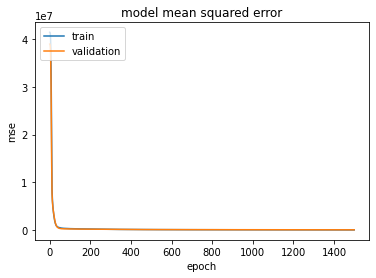

In [16]:
print(history.history.keys())
#  "Accuracy"
plt.figure()
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('model mean squared error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [20]:

pred = model.predict(pdf_df)
# pred = pred * std_y + mean_y
# y = np.where(y > 0.5, 1, 0)
submit = {'country_id': index, 'next_week_hospitalizations':pred.astype(int).flatten()}
sdf = pd.DataFrame(data = submit)
sdf.to_csv('submit.csv',index = False)